In [1]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data = data.rename(columns={'v1': 'label', 'v2': 'text'})
X = data['text']
y = data['label']


In [3]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a count vectorizer to convert the text messages into numerical vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [5]:
# Define the base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = MultinomialNB()
svm = SVC(kernel="linear", random_state=42)

Random Forest Accuracy: 0.9757847533632287


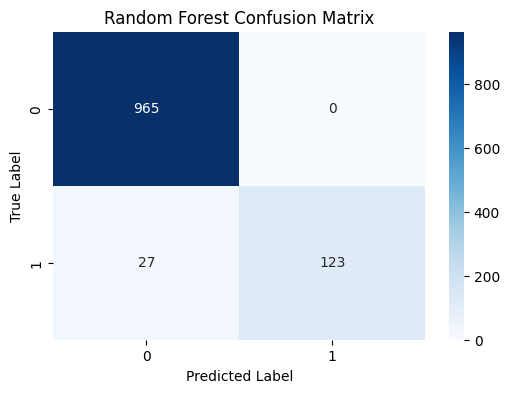

In [6]:
# Individual Algorithm implementation

# Random Forest
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Naive Bayes Accuracy: 0.9838565022421525


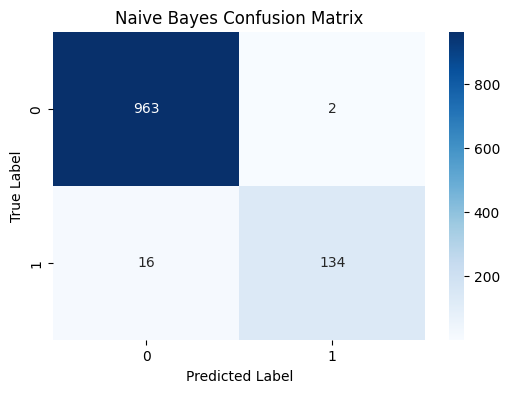

In [7]:
# Naive Bayes
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

SVM Accuracy: 0.979372197309417


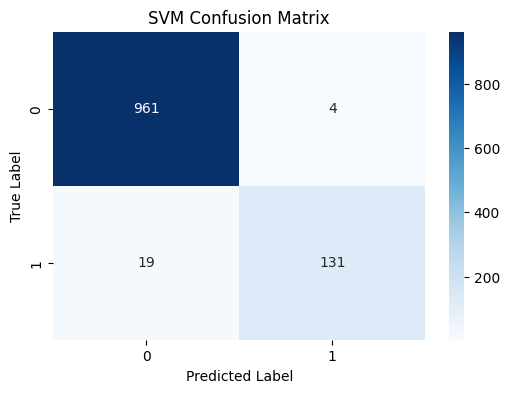

In [8]:
# SVM
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Stacking Classifier Accuracy: 0.9856502242152466


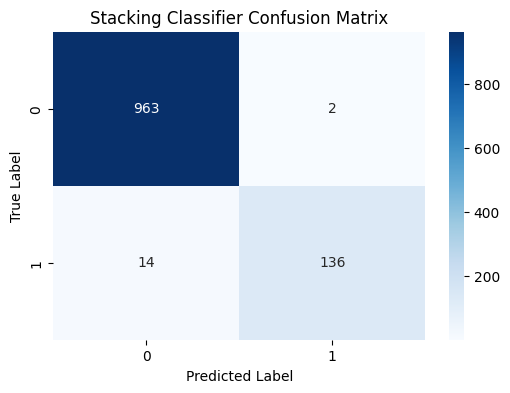

In [9]:
# Ensemble using StackingClassifier
stacking_classifier = StackingClassifier(estimators=[('rf', rf), ('nb', nb), ('svm', svm)], final_estimator=svm)
stacking_classifier.fit(X_train, y_train)
stacking_predictions = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Classifier Accuracy:", stacking_accuracy)
stacking_cm = confusion_matrix(y_test, stacking_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(stacking_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Stacking Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [10]:
# GUI Application
def classify_message():
    message = text_entry.get("1.0", tk.END).strip()
    if len(message) == 0:
        messagebox.showwarning("Warning", "Please enter a message.")
        return
    message_vectorized = vectorizer.transform([message])
    prediction = stacking_classifier.predict(message_vectorized)[0]
    messagebox.showinfo("Prediction", f"The message is {prediction}.")

# Create the GUI
window = tk.Tk()
window.title("Spam Detection")
window.geometry("400x200")

# Styling
window.configure(bg='#FDFEFE')
window.option_add("*Font", "Arial 12")

label = tk.Label(window, text="Enter a message:", bg='#FDFEFE', fg='#154360')
label.pack(pady=10)

text_entry = tk.Text(window, height=5, bg='#FDFEFE', fg='#154360', relief=tk.SOLID, bd=2)
text_entry.pack(pady=10)

classify_button = tk.Button(window, text="Classify", command=classify_message, bg='#154360', fg='#FDFEFE',
                            relief=tk.SOLID, bd=2)
classify_button.pack(pady=10)

window.mainloop()